In [78]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv(r"C:\Users\TUF\Desktop\dataset\annex1.csv")
df2 = pd.read_csv(r"C:\Users\TUF\Desktop\dataset\annex2.csv")
df.head(10)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables
5,102900005115779,Yunnan Shengcai,1011010101,Flower/Leaf Vegetables
6,102900005115786,Zhuyecai,1011010101,Flower/Leaf Vegetables
7,102900005115793,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
8,102900005115816,Nanguajian,1011010101,Flower/Leaf Vegetables
9,102900005115823,Shanghaiqing,1011010101,Flower/Leaf Vegetables


In [80]:
df.drop_duplicates() #Drops the duplicates
df.info() #Gives Information about null data and more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [81]:
df['Category Name'] = df['Category Name'].str.replace('\xa0', '') # Removing Non-Breaking space characters
df['Item Name'] = df['Item Name'].str.lower() # Standardisation : converts all the letters to lowercase
df['Category Name'] = df['Category Name'].str.lower() # Standardisation : converts all the letters to lowercase
df.head(10)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,niushou shengcai,1011010101,flower/leafvegetables
1,102900005115199,sichuan red cedar,1011010101,flower/leafvegetables
2,102900005115625,local xiaomao cabbage,1011010101,flower/leafvegetables
3,102900005115748,white caitai,1011010101,flower/leafvegetables
4,102900005115762,amaranth,1011010101,flower/leafvegetables
5,102900005115779,yunnan shengcai,1011010101,flower/leafvegetables
6,102900005115786,zhuyecai,1011010101,flower/leafvegetables
7,102900005115793,chinese cabbage,1011010101,flower/leafvegetables
8,102900005115816,nanguajian,1011010101,flower/leafvegetables
9,102900005115823,shanghaiqing,1011010101,flower/leafvegetables


In [82]:
for index,row in df.iterrows():
    df.at[index,'Category Name']= row['Category Name'].replace('/leafvegetables','').replace('edible ','').replace(' tuberous vegetables','')
    
df.tail(50)

,Item Code,Item Name,Category Code,Category Name
201,102900011012994,apricot bao mushroom (bag),1011010801,mushroom
202,102900011013274,the white mushroom (bag),1011010801,mushroom
203,102900011018095,chinese caterpillar fungus flowers (bag),1011010801,mushroom
204,102900011021675,chopped red pine,1011010801,mushroom
205,102900011021699,the steak mushrooms,1011010801,mushroom
206,102900011023075,white jelly mushroom,1011010801,mushroom
207,102900011026793,apricot bao mushroom (250 g),1011010801,mushroom
208,102900011030561,chopped red pine (box),1011010801,mushroom
209,102900011030608,the steak mushrooms (box),1011010801,mushroom
210,102900011030615,the pork stomach mushroom (box),1011010801,mushroom


In [83]:
merged_data = pd.merge(df, df2[['Date', 'Time', 'Item Code']], on='Item Code', how='right')
merged_data.head(100)

,Item Code,Item Name,Category Code,Category Name,Date,Time
0,102900005117056,paopaojiao (jingpin),1011010504,capsicum,2020-07-01,09:15:07.924
1,102900005115960,chinese cabbage,1011010101,flower,2020-07-01,09:17:27.295
2,102900005117056,paopaojiao (jingpin),1011010504,capsicum,2020-07-01,09:17:33.905
3,102900005115823,shanghaiqing,1011010101,flower,2020-07-01,09:19:45.450
4,102900005115908,caixin,1011010101,flower,2020-07-01,09:20:23.686
...,...,...,...,...,...,...
95,102900005115779,yunnan shengcai,1011010101,flower,2020-07-01,10:13:08.905
96,102900005125808,millet pepper,1011010504,capsicum,2020-07-01,10:13:25.034
97,102900005125815,apricot bao mushroom (1),1011010801,mushroom,2020-07-01,10:13:39.264
98,102900005115779,yunnan shengcai,1011010101,flower,2020-07-01,10:14:44.982


In [84]:
time_occurrences = merged_data['Time'].value_counts()
print(time_occurrences) #Number of occurrences of each time value

Time
10:05:12.655    6
09:37:24.655    5
18:18:35.264    5
09:34:20.717    4
18:11:43.061    4
               ..
09:36:37.701    1
09:36:47.983    1
09:38:14.294    1
09:38:24.197    1
21:40:48.248    1
Name: count, Length: 849632, dtype: int64


In [85]:
date_occurrences = merged_data['Date'].value_counts()
print(date_occurrences) #Number of occurrences of each Date value

Date
2021-02-10    3747
2022-11-19    3215
2023-01-20    3177
2022-11-21    2627
2021-02-09    2501
              ... 
2022-12-04     277
2021-04-06     277
2022-11-27      84
2022-11-28      78
2022-11-29      74
Name: count, Length: 1085, dtype: int64


In [86]:
print(merged_data.loc[705020])

Item Code        102900005116257
Item Name           eggplant (2)
Category Code         1011010501
Category Name            solanum
Date                  2022-11-03
Time                    13:03:52
Name: 705020, dtype: object


In [87]:
print(merged_data.loc[705021])

Item Code                 102900011033944
Item Name        apricot bao mushroom (2)
Category Code                  1011010801
Category Name                    mushroom
Date                           2022-11-03
Time                         13:03:52.948
Name: 705021, dtype: object


In [88]:
merged_data['Time'] = merged_data['Time'].str[:8]
merged_data.head(10)

,Item Code,Item Name,Category Code,Category Name,Date,Time
0,102900005117056,paopaojiao (jingpin),1011010504,capsicum,2020-07-01,09:15:07
1,102900005115960,chinese cabbage,1011010101,flower,2020-07-01,09:17:27
2,102900005117056,paopaojiao (jingpin),1011010504,capsicum,2020-07-01,09:17:33
3,102900005115823,shanghaiqing,1011010101,flower,2020-07-01,09:19:45
4,102900005115908,caixin,1011010101,flower,2020-07-01,09:20:23
5,102900005117056,paopaojiao (jingpin),1011010504,capsicum,2020-07-01,09:21:55
6,102900005115779,yunnan shengcai,1011010101,flower,2020-07-01,09:21:56
7,102900005117056,paopaojiao (jingpin),1011010504,capsicum,2020-07-01,09:22:01
8,102900005115779,yunnan shengcai,1011010101,flower,2020-07-01,09:22:01
9,102900011008522,sweet chinese cabbage,1011010101,flower,2020-07-01,09:22:15


In [89]:
print(merged_data.loc[705020])

Item Code        102900005116257
Item Name           eggplant (2)
Category Code         1011010501
Category Name            solanum
Date                  2022-11-03
Time                    13:03:52
Name: 705020, dtype: object


In [90]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Item Code      878503 non-null  int64 
 1   Item Name      878503 non-null  object
 2   Category Code  878503 non-null  int64 
 3   Category Name  878503 non-null  object
 4   Date           878503 non-null  object
 5   Time           878503 non-null  object
dtypes: int64(2), object(4)
memory usage: 40.2+ MB


In [91]:
merged_data['Invoice_ID'] = merged_data['Date'].astype(str) + '_' + merged_data['Time'].astype(str)

merged_data['Invoice_ID'] = merged_data.groupby(['Date', 'Time']).ngroup()

merged_data.tail(100)

,Item Code,Item Name,Category Code,Category Name,Date,Time,Invoice_ID
878403,102900005116714,broccoli,1011010201,cabbage,2023-06-30,19:50:16,756891
878404,102900005118824,high melon (1),1011010402,aquatic,2023-06-30,19:50:24,756892
878405,102900011030059,yunnan lettuce (bag),1011010101,flower,2023-06-30,19:55:45,756893
878406,102900011034026,zhijiang qinggengsanhua,1011010201,cabbage,2023-06-30,19:55:49,756894
878407,102900005116714,broccoli,1011010201,cabbage,2023-06-30,19:55:55,756895
...,...,...,...,...,...,...,...
878498,102900005115250,xixia black mushroom (1),1011010801,mushroom,2023-06-30,21:35:13,756978
878499,102900011022764,changxianqie,1011010501,solanum,2023-06-30,21:35:14,756979
878500,102900005115250,xixia black mushroom (1),1011010801,mushroom,2023-06-30,21:35:20,756980
878501,102900011016701,wuhu green pepper (1),1011010504,capsicum,2023-06-30,21:35:21,756981


In [92]:
average_records_per_invoice = merged_data.groupby('Invoice_ID').size().mean()

print(f"Average number of records per Invoice ID: {average_records_per_invoice}")

Average number of records per Invoice ID: 1.1605320066632936


In [93]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Item Code      878503 non-null  int64 
 1   Item Name      878503 non-null  object
 2   Category Code  878503 non-null  int64 
 3   Category Name  878503 non-null  object
 4   Date           878503 non-null  object
 5   Time           878503 non-null  object
 6   Invoice_ID     878503 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 46.9+ MB


In [94]:
merged_data.shape

(878503, 7)

In [95]:
merged_data.columns

Index(['Item Code', 'Item Name', 'Category Code', 'Category Name', 'Date',
       'Time', 'Invoice_ID'],
      dtype='object')

In [96]:
#KMeans can only work with numerical data.
#To overcome that , one hot encoding was usd to represent each category as a vector
#X_categorical = pd.get_dummies(merged_data[['Category Name']])
#X_invoice_id = merged_data['Invoice_ID']
#X = pd.concat([X_categorical, X_invoice_id], axis=1)
X= merged_data[['Category Code','Invoice_ID']]
X

,Category Code,Invoice_ID
0,1011010504,0
1,1011010101,1
2,1011010504,2
3,1011010101,3
4,1011010101,4
...,...,...
878498,1011010801,756978
878499,1011010501,756979
878500,1011010801,756980
878501,1011010504,756981


In [97]:
k_means = KMeans() #default 8 clusters
k_means.fit(X) #Trains the model

C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [98]:
k_means.fit_predict(X) #trains and creates clusters

C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 5, 5, ..., 7, 7, 7])

In [99]:
#Get the number of unique categories
no_category = merged_data["Category Name"].value_counts()
print(no_category)

Category Name
flower      331968
capsicum    207996
mushroom    148424
cabbage      86570
aquatic      58647
solanum      44898
Name: count, dtype: int64


In [100]:
#Using Elbow method to find the optimal number of clusters
#Running the KMeans cluster algorithm in a loop provides WCSS : Within Clusters Sum of Squares metric
#Inertia attribute k_means helps to find the wcss

wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

In [101]:
wcss

[4.310824862089834e+16,
 1.0426398558259252e+16,
 4569044353735587.0,
 2622619968423337.5,
 1686018798065467.8,
 1161781518959557.2,
 859233458777106.4,
 656551456608681.1,
 516427332509311.1,
 420874228751932.3]

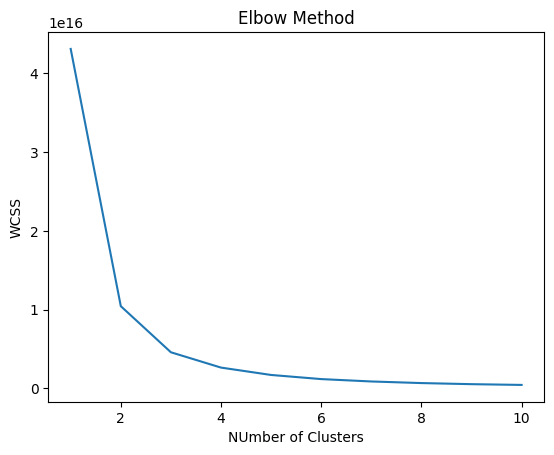

In [102]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [103]:
#The graph proceeds to decrease slowly after 4 , so 4 could be chosen as the optimal number of clusters
#Modelling and training with the optimal number of clusters
k_means = KMeans(n_clusters=4,random_state=42)
y_means = k_means.fit_predict(X)

C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


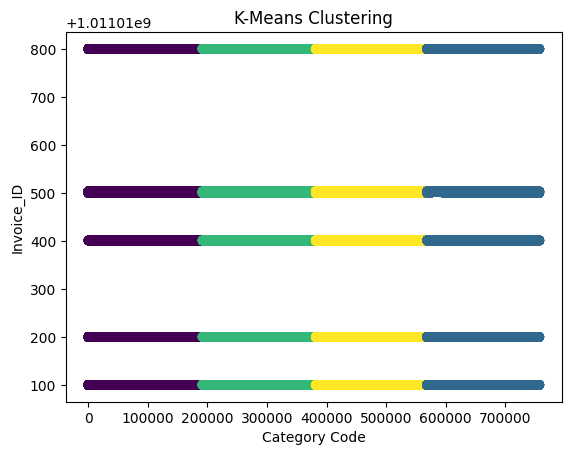

In [110]:
# Scatter plot
plt.scatter(X['Invoice_ID'],X['Category Code'], c=y_means, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Category Code')
plt.ylabel('Invoice_ID')
plt.show()
